<a href="https://colab.research.google.com/github/MauriceLaf/CAP4630/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Homework 2


##Problem 1

Find three simple bivariate functions f1, f2, and f3 and three points p1, p2, p3 such that

p1 is a minimum of f1
p2 is a maximum of f2
p3 is neither a minimum nor maximum of f3, but the gradient of f3 at p3 is the zero vector.
Use (a) three-dimensional plots as in three_dimensional_plotting.ipynb and (b) density plots and (c) contour plots as in density_and_contour_plots.ipynb. Indicate clearly the points p1, p2, and p3 in all plots.

In [0]:
def f(x, y):
    return x ** 2 + y ** 2

In [0]:
x = np.linspace(-10, 10, 45)
y = np.linspace(-10, 10, 45)

X, Y = np.meshgrid(x, y)
f1 = X**2 + Y**2
f2 = - X**2 - Y**2
f3 = -X**2 + Y**2

Point (Minimum) is [0],[0],[0]


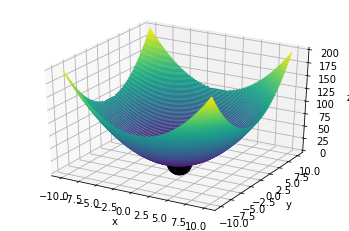

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f1, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#Minimum point at 0,0,0
ax.plot([0], [0], [0], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=25, alpha=1)
print("Point (Minimum) is [0],[0],[0]")

Point (Minimum) is [0],[0],[0]


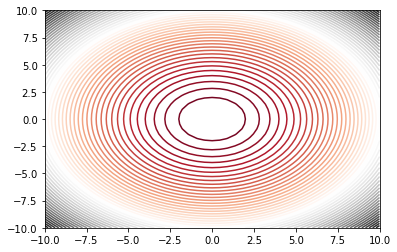

In [5]:
X, Y = np.meshgrid(x, y)
Z = f1
plt.contour(X, Y, Z, 50, cmap='RdGy')
print("Point (Minimum) is [0],[0],[0]")

Point (Minimum) is [0],[0],[0]


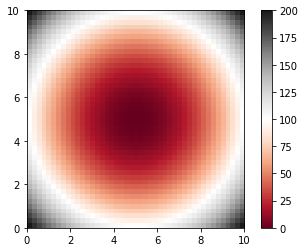

In [6]:
plt.imshow(Z, extent=[0, 10, 0, 10], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');
print("Point (Minimum) is [0],[0],[0]")

Point (Maximum) is [0],[0],[0]


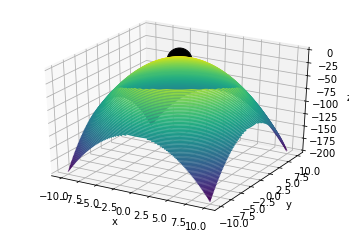

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f2, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot([0], [0], [0], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=25, alpha=1)
print("Point (Maximum) is [0],[0],[0]")


Point (Maximum) is [0],[0],[0]


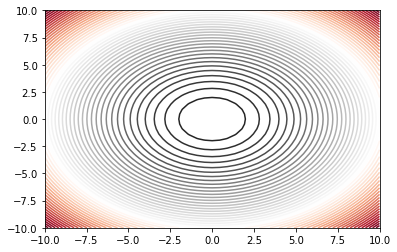

In [8]:
X, Y = np.meshgrid(x, y)
Z = f2
plt.contour(X, Y, Z, 50, cmap='RdGy');
print("Point (Maximum) is [0],[0],[0]")

Point (Maximum) is [0],[0],[0]


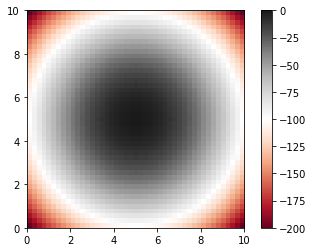

In [9]:
plt.imshow(Z, extent=[0, 10, 0, 10], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');
print("Point (Maximum) is [0],[0],[0]")

Point (Gradient at 0) is [0],[0],[0]


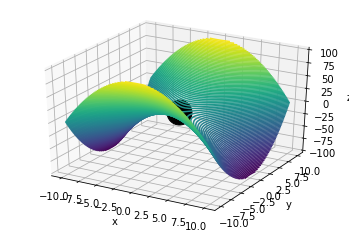

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f3, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot([0], [0], [0], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=25, alpha=1)
print("Point (Gradient at 0) is [0],[0],[0]")

Point (Gradient at 0) is [0],[0],[0]


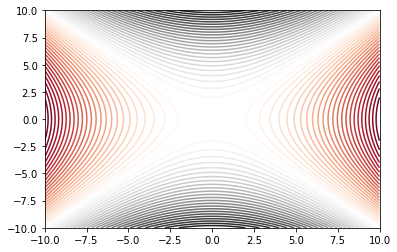

In [11]:
X, Y = np.meshgrid(x, y)
Z = f3
plt.contour(X, Y, Z, 50, cmap='RdGy');
print("Point (Gradient at 0) is [0],[0],[0]")

Point (Gradient at 0) is [0],[0],[0]


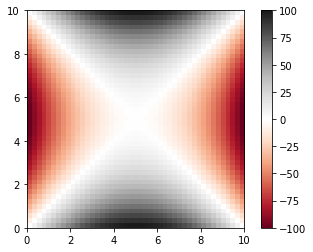

In [12]:
plt.imshow(Z, extent=[0, 10, 0, 10], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');
print("Point (Gradient at 0) is [0],[0],[0]")

##Problem 2
Extend the code for mini-batch gradient descent in the notebook linear_regression_gradient_descent.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

###Sample Points

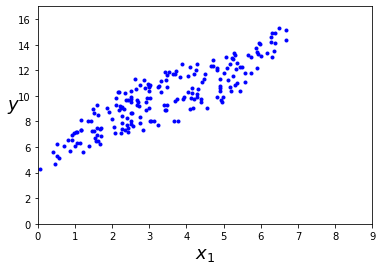

In [13]:
# generate m random pairs (x, y)

m = 200
X = 2 * np.random.rand(m, 1)
X2 = 5 * np.random.rand(m, 1)
y = (4 + 3 * X + 1 * X2) + np.random.rand(m, 1)
plt.plot(X + X2, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 9, 0, 17])
plt.show()

###Initial Weight

In [14]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)
print(initial_weight)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X, X2])

###Determine Weights and Graph Predictions

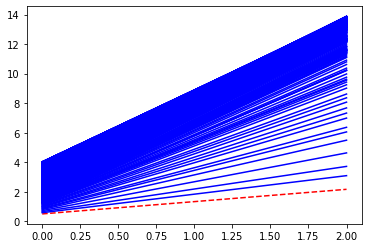

In [16]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

X_new = np.array([[0], [2]])
X2_new = np.array([[0], [3]])
X_new_b = np.column_stack([np.ones((2, 1)), X_new, X2_new])
y_predict = X_new_b.dot(weight)
plt.plot(X_new, y_predict, "r--")

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)
        y_predict = X_new_b.dot(weight) 
        plt.plot(X_new, y_predict, "b-")

###Graph Gradient Descent 
(not sure if needed for assignment)

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

array([[4.02721531],
       [3.23349149],
       [1.06558943]])

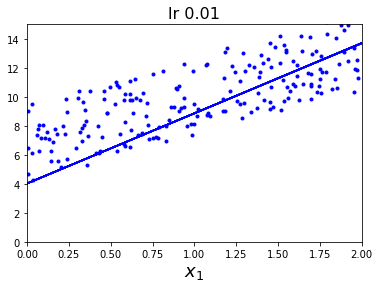

In [18]:
plot_gradient_descent(weight, lr, weight_path=weight_path_mgd)
weight_path_mgd[-1]

##Problem 3
What does an average MNIST digit look like? For each i=0,1,...,9, compute the average of digit i and display it. More precisely, you have add all the images of the digit i together and divide it by the number of times the digit i occurs in the data set.

Use tf.keras.datasets to load the MNIST digits dataset.

In [19]:
%tensorflow_version 2.x
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

TensorFlow 2.x selected.
11493376/11490434 [==============================] - 0s 0us/step


Below are the average image of the first 50 MNIST images

Image of:  0  -  4  images.


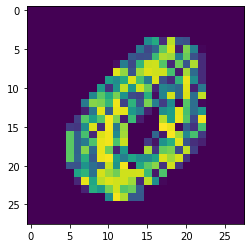

Image of:  1  -  7  images.


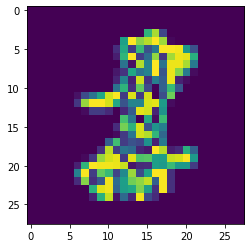

Image of:  2  -  4  images.


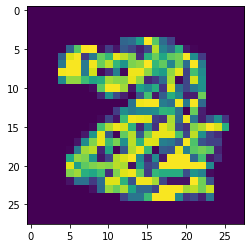

Image of:  3  -  8  images.


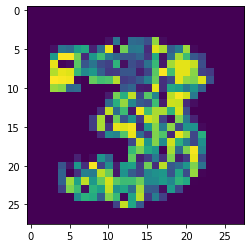

Image of:  4  -  4  images.


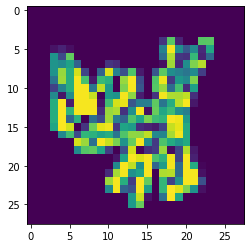

Image of:  5  -  4  images.


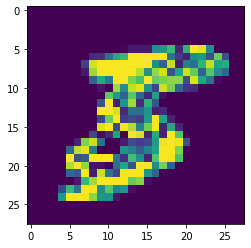

Image of:  6  -  5  images.


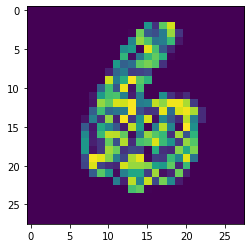

Image of:  7  -  4  images.


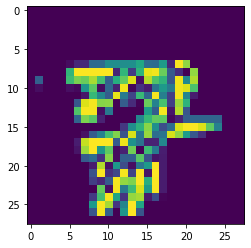

Image of:  8  -  4  images.


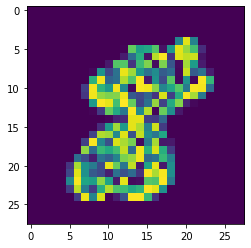

Image of:  9  -  7  images.


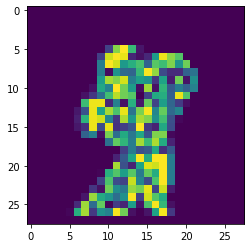

In [20]:
total = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
average = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(train_images)):
    total[train_labels[i]] += train_images[i]
    count[train_labels[i]] += 1
    if (i == 50):
      break

for i in range(len(total)):
    average[i] = total[i]/count[i]
    print("Image of: ", i, " - ", count[i], " images.")
    plt.figure(figsize=(4, 4))
    plt.imshow(average[i])
    plt.show()


Below is the average for all 60000 MNIST images

Image of:  0  -  5923  images.


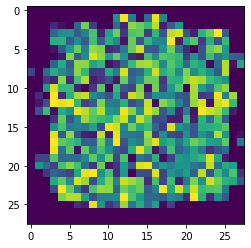

Image of:  1  -  6742  images.


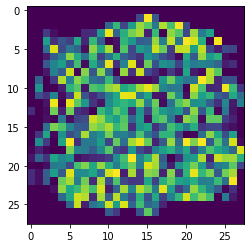

Image of:  2  -  5958  images.


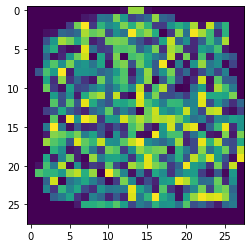

Image of:  3  -  6131  images.


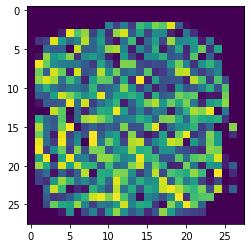

Image of:  4  -  5842  images.


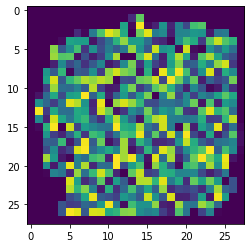

Image of:  5  -  5421  images.


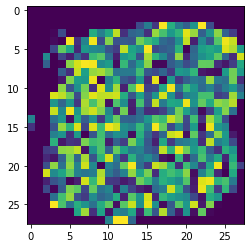

Image of:  6  -  5918  images.


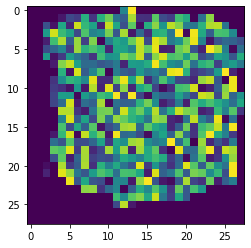

Image of:  7  -  6265  images.


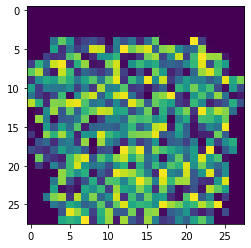

Image of:  8  -  5851  images.


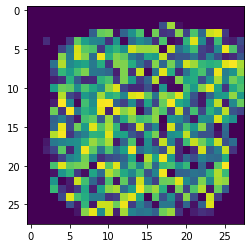

Image of:  9  -  5949  images.


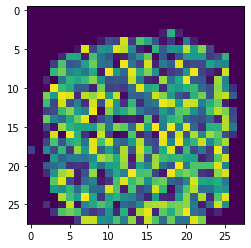

In [21]:
total = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
average = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(train_images)):
    total[train_labels[i]] += train_images[i]
    count[train_labels[i]] += 1

for i in range(len(total)):
    average[i] = total[i]/count[i]
    print("Image of: ", i, " - ", count[i], " images.")
    plt.figure(figsize=(4, 4))
    plt.imshow(average[i])
    plt.show()